## Exercise 22

In [1]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# in pyomo there concrete and abstract models. The abstract models are silghtly more tedious to set up,
# and a bit harder to understand in a first contact with Pyomo, 
# but then much better for reuse. We use the easy version:
model = ConcreteModel()

#Add some constants to the model
model.N = 50 # number of bugs
model.max_x = 5.0 # width of the box of bugs
model.max_y = 3.0 # length of the box of bugs

# each bug will have x- and y- coordinates, so the lists of all x- resp. y-coordinates
# will each have indices ranging from 0 to N-1.
# This set of indices is part of the model and has to be declared explicitly:
model.indices = range(model.N)

# Add a list of x- and a list of y-coordinates to the model

# We will give them initial values produced by this function:
def random_value(model, i):
    return random.uniform(0,1)
# (we don't need the arguments of this function, but the constructor below wants 
# to call a function with two arguments, hence the strange declaration)

# Declare variables of the model:
model.x = Var(model.indices, bounds = (0, None), initialize = random_value)
model.y = Var(model.indices, bounds = (0, None), initialize = random_value)
model.r = Var(bounds = (0, None), initialize = random.uniform(0,1))
# although we only want to model bugs, and those are taken care of by the variables x,y
# it is convenient to add another variable r that act as a lower bound of all bug distances

# for part (b) you should drop a cookie at a random place
# since the cookie doesn't move, you should declare it a parameter, not a variable
# -- otherwise it will be shifted around during optimizing (try it out!)
# this is how it's done:
# model.cookie_x = Param(initialize=random.uniform(0,model.max_x))
# model.cookie_y = Param(initialize=random.uniform(0,model.max_y))


# Now we build a list of constraints for the variables
model.limits = ConstraintList() # start with the empty list
# add constraints saying that each bug sits inside the box)
for i in model.indices:
    model.limits.add(model.x[i] <= model.max_x)
    model.limits.add(model.y[i] <= model.max_y)
    

# the above was one way to add constraints, here comes another way:
# We can define constraint functions really as Python functions
# This is super nice and flexible, way more than having to write a closed formula!
def distance_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip

model.radius_constraint = Constraint(model.indices, model.indices, rule=distance_rule)
    

# Add an objective to the model:
# This specifies that we want to maximize the variable r of the model
model.obj = Objective( expr= model.r, sense= maximize)

## You could also add the objective in the style of the second constraint we added, i.e.
## define a Python function and then declare that to be the objective. Here is how:
##
## def my_objective(model):
##     bla bla
##
## model.obj = Objective( rule= my_objective, sense= maximize)


# Pyomo has no optimization algorithms in itself
# it uses other libraries, and you have to specify which:
opt = SolverFactory('ipopt') 

#here the magic happens:
results=opt.solve(model)    
# it can take a while, so better tell when it's done:
print('Done!')
    
    

Done!


In [ ]:
# ... has the "Done!" been printed yet? If no, wait!

Minimum distance is  0.629


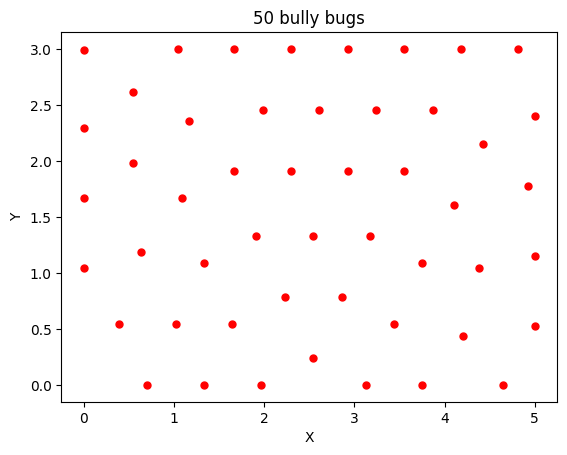

In [3]:
X=[value(model.x[i]) for i in model.indices]
Y=[value(model.y[i]) for i in model.indices]
plt.scatter(X,Y,s=25,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(str(value(model.N))+' bully bugs')
print('Minimum distance is ',round(value(model.r),3))

### Part a.

A diagonal wall is put into the box, from the upper left to the lower right corner, and the bugs are all thrown into the lower left half of the now divided box. Modify the given program to show how the bugs distribute now.

In [15]:
# in pyomo there concrete and abstract models. The abstract models are silghtly more tedious to set up,
# and a bit harder to understand in a first contact with Pyomo, 
# but then much better for reuse. We use the easy version:
model = ConcreteModel()

#Add some constants to the model
model.N = 50 # number of bugs
model.max_x = 5.0 # width of the box of bugs
model.max_y = 3.0 # length of the box of bugs


# each bug will have x- and y- coordinates, so the lists of all x- resp. y-coordinates
# will each have indices ranging from 0 to N-1.
# This set of indices is part of the model and has to be declared explicitly:
model.indices = range(model.N)

# Add a list of x- and a list of y-coordinates to the model

# We will give them initial values produced by this function:
def random_value(model, i):
    return random.uniform(0,1)
# (we don't need the arguments of this function, but the constructor below wants 
# to call a function with two arguments, hence the strange declaration)

# Declare variables of the model:
model.x = Var(model.indices, bounds = (0, None), initialize = random_value)
model.y = Var(model.indices, bounds = (0, None), initialize = random_value)
model.r = Var(bounds = (0, None), initialize = random.uniform(0,1))
# although we only want to model bugs, and those are taken care of by the variables x,y
# it is convenient to add another variable r that act as a lower bound of all bug distances


# Now we build a list of constraints for the variables
model.limits = ConstraintList() # start with the empty list
# add constraints saying that each bug sits inside the box)
for i in model.indices:
    model.limits.add(model.x[i] <= model.max_x)
    #model.limits.add(model.y[i] <= model.max_y)
    model.limits.add(model.y[i] <= -0.6 * model.x[i] + 3)
    

# the above was one way to add constraints, here comes another way:
# We can define constraint functions really as Python functions
# This is super nice and flexible, way more than having to write a closed formula!
def distance_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip

model.radius_constraint = Constraint(model.indices, model.indices, rule=distance_rule)
    

# Add an objective to the model:
# This specifies that we want to maximize the variable r of the model
model.obj = Objective( expr= model.r, sense= maximize)



# Pyomo has no optimization algorithms in itself
# it uses other libraries, and you have to specify which:
opt = SolverFactory('ipopt') 

#here the magic happens:
results=opt.solve(model)    
# it can take a while, so better tell when it's done:
print('Done!')
    
    

Done!


Minimum distance is  0.471


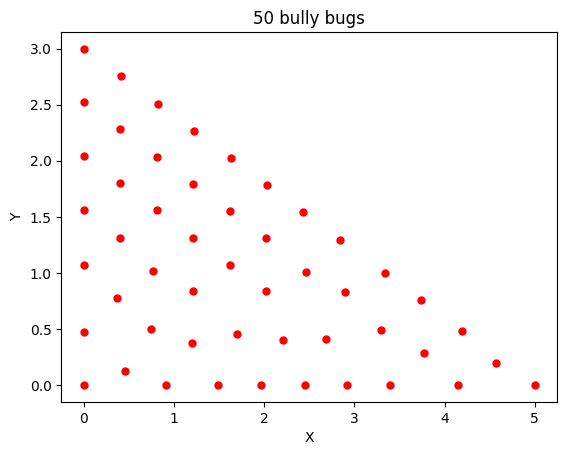

In [16]:
X=[value(model.x[i]) for i in model.indices]
Y=[value(model.y[i]) for i in model.indices]
plt.scatter(X,Y,s=25,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(str(value(model.N))+' bully bugs')
print('Minimum distance is ',round(value(model.r),3))

## Part b.

Now a cookie is thrown into the box. Tasmania is a remote place, and the bugs have never seen such a tasty looking thing! They all want to be close to the cookie, but still keep their distance from each other. In fact their personal space is 17 times more important to them than being close to the cookie, i.e. they want to solve the problem

In [112]:
#import math

# in pyomo there concrete and abstract models. The abstract models are silghtly more tedious to set up,
# and a bit harder to understand in a first contact with Pyomo, 
# but then much better for reuse. We use the easy version:
model = ConcreteModel()

#Add some constants to the model
model.N = 50 # number of bugs
model.max_x = 5.0 # width of the box of bugs
model.max_y = 3.0 # length of the box of bugs

# each bug will have x- and y- coordinates, so the lists of all x- resp. y-coordinates
# will each have indices ranging from 0 to N-1.
# This set of indices is part of the model and has to be declared explicitly:
model.indices = range(model.N)

# Add a list of x- and a list of y-coordinates to the model

# We will give them initial values produced by this function:
def random_value(model, i):
    return random.uniform(0,1)
# (we don't need the arguments of this function, but the constructor below wants 
# to call a function with two arguments, hence the strange declaration)

# Declare variables of the model:
model.x = Var(model.indices, bounds = (0, None), initialize = random_value)
model.y = Var(model.indices, bounds = (0, None), initialize = random_value)
model.r = Var(bounds = (0, None), initialize = random.uniform(0,1))
# although we only want to model bugs, and those are taken care of by the variables x,y
# it is convenient to add another variable r that act as a lower bound of all bug distances

# for part (b) you should drop a cookie at a random place
# since the cookie doesn't move, you should declare it a parameter, not a variable
# -- otherwise it will be shifted around during optimizing (try it out!)
# this is how it's done:
model.cookie_x = Param(initialize=random.uniform(0,model.max_x))   # x coordinate of the center of the cookie
model.cookie_y = Param(initialize=random.uniform(0,model.max_y))   # y coordinate of the center of the cookie
model.cookie_r = Param(initialize = random.uniform(0, min(model.max_x, model.max_y)/2)) # length of the radius

# Now we build a list of constraints for the variables
model.limits = ConstraintList() # start with the empty list
# add constraints saying that each bug sits inside the box)
for i in model.indices:
    model.limits.add(model.x[i] <= model.max_x)
    model.limits.add(model.y[i] <= -0.6 * model.x[i] + 3)
    model.limits.add(
         model.cookie_r**2 <= (model.x[i] - model.cookie_x)**2 + (model.y[i] - model.cookie_y)**2)
    

# the above was one way to add constraints, here comes another way:
# We can define constraint functions really as Python functions
# This is super nice and flexible, way more than having to write a closed formula!
def distance_rule(model,i,j):
    if i!=j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
        return Constraint.Skip

model.radius_constraint = Constraint(model.indices, model.indices, rule=distance_rule)

# Add an objective to the model:
# This specifies that we want to maximize the variable r of the model and distance from cookie
model.obj = Objective( expr = 17 * model.r - model.cookie_r, sense = maximize)


# Pyomo has no optimization algorithms in itself
# it uses other libraries, and you have to specify which:
opt = SolverFactory('ipopt') 

#here the magic happens:
results=opt.solve(model)    
# it can take a while, so better tell when it's done:
print('Done!')
    
    

Done!


Minimum distance is  0.351


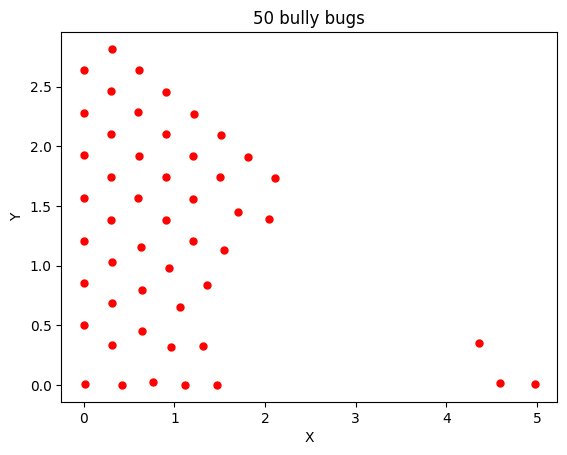

In [113]:
X=[value(model.x[i]) for i in model.indices]
Y=[value(model.y[i]) for i in model.indices]
plt.scatter(X,Y,s=25,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(str(value(model.N))+' bully bugs')
print('Minimum distance is ',round(value(model.r),3))